<div align="center">
This is a sample analysis of gypsy moth infestation on counties in Virginia with the moth and county data downloaded from  
<a href="http://globe.asets.msu.edu/sts_mapserver/" class="btn">Slow the Spread map viewer</a>
</div>

### Spatial analysis of impact of gypsy moth infestation
This analysis is used to extract the parts of counties in Virginia that are effected by moth line. These features can then be used to study the impact on county specific forestry and property values. 

In [ ]:
import datetime
import arcgis
from arcgis.gis import GIS
from IPython.display import display

gis = GIS("https://www.arcgis.com","user","pass")
gis.content.search('title:Mothline')

<Item title:"Mothline" type:Feature Service owner:arcgis_python>
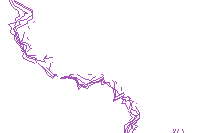

In [7]:
mothline_layer = gis.content.search('title:Mothline')[1]
mothline_layer

### Buffer analysis from gypsy moths in Virginia
Let us create a map widget to see the fire related information in it's geographic context:

In [16]:
# create a map zoomed to Virginia
virginia_map = gis.map('Virginia', 6)
# add the moth data
virginia_map.add_layer(mothline_layer)
virginia_map

In [18]:
from arcgis.features.use_proximity import create_buffers

moth_buffers = create_buffers(mothline_layer, [3], None, 'Miles', output_name="moth_Buffers_42017" )

virginia_map.add_layer(moth_buffers)

In [20]:
moth_buffers.share(True)

{'itemId': '866588ed4b40454484b5d6cc3fda01d7', 'notSharedWith': []}

In [71]:
virgnia_map.add_layer(moth_buffers)
moth_buffers.share(True)

### Add counties layer to map


In [23]:
va_counties_layer = gis.content.search('title:Virginia Counties', item_type ="Feature Service")[0]
va_counties_layer.share(True)

{'itemId': '0cdee9dddd8145338a44d47e966210c3', 'notSharedWith': []}

### Dissolve the buffer polygons

This is to avoid duplicate results as a result of intersecting buffer polygons.

In [11]:
from arcgis.features.manage_data import dissolve_boundaries

dissolve_moth_line = dissolve_boundaries(moth_buffers,output_name="dissolve_mothlayer")

In [12]:
dissolve_mothline

<Item title:"dissolve_mothlayer" type:Feature Service owner:arcgis_python>

### Extract county polygons impacted by moth infestation

In [26]:
from arcgis.features.manage_data import overlay_layers

risk_counties = overlay_layers(moth_buffers, va_counties_layer, overlay_type="Intersect", output_name="At_Risk_Counties_2017")

In [34]:
risk_counties_map = gis.content.search("title:At_Risk_Counties_2017")
risk_counties_map[1]

<Item title:"At_Risk_Counties_2017" type:Feature Service owner:arcgis_python>

### View the area attribute of the polygons 



In [ ]:
at_risk_va_counties = risk_counties.layers[0]
features = at_risk_va_counties.query()
result_dataframe = features.df
result_dataframe.head(10)

### Add results to the map



In [16]:
final_map = gis.map('Virginia', 6)

In [17]:
final_map.add_layer(at_risk_va_counties)